In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
up_df=pd.read_csv("updated_pollution_dataset.csv")
up_df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [3]:
up_df.shape

(5000, 10)

In [4]:
cat_col=up_df.select_dtypes(include="object").columns
cat_col

Index(['Air Quality'], dtype='object')

In [5]:
num_col=up_df.select_dtypes(exclude="object").columns
num_col

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density'],
      dtype='object')

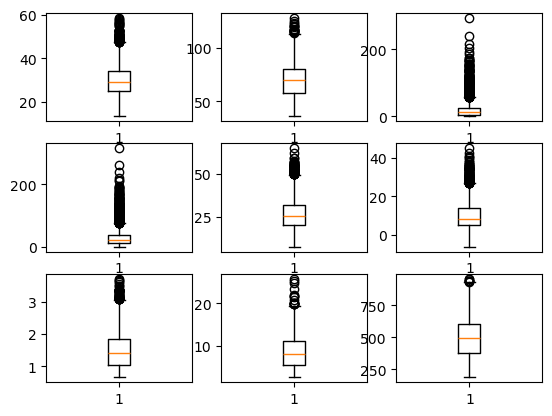

In [6]:
for i in  range(len(num_col)):
    plt.subplot(3,3,i+1)
    plt.boxplot(x=num_col[i],data=up_df)

{'whiskers': [<matplotlib.lines.Line2D at 0x1e10cbbd130>,
 'caps': [<matplotlib.lines.Line2D at 0x1e10cbbd6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e10cbbcec0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e10cbbdd00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e10cbbdfd0>],
 'means': []}

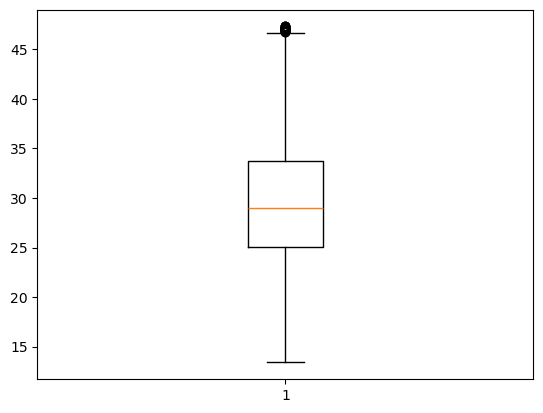

In [7]:
app=up_df['Temperature']
q1=np.percentile(app,25)
q3=np.percentile(app,75)
IQR=q3-q1
lb=q1-1.5*IQR
ub=q3+1.5*IQR
con1=app<lb
con2=app>ub
con3=con1|con2
# app[con3]

med=app.median()
up_df['Temperature']=np.where(con3,med,app)
plt.boxplot(up_df['Temperature'])

In [8]:
for i in num_col:
    app=up_df[i]
    q1=np.percentile(app,25)
    q3=np.percentile(app,75)
    IQR=q3-q1
    lb=q1-1.5*IQR
    ub=q3+1.5*IQR
    con1=app<lb
    con2=app>ub
    con3=con1|con2
    # app[con3]
    
    med=app.median()
    up_df[i]=np.where(con3,med,app)




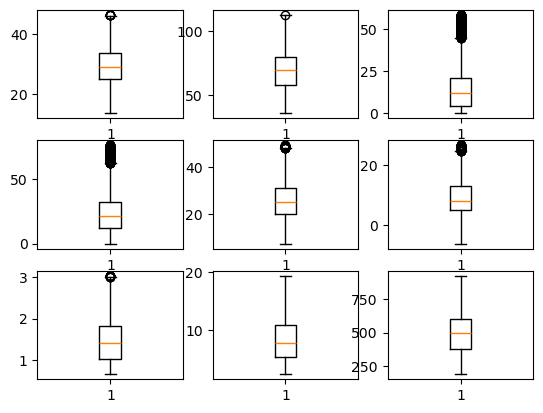

In [9]:
for i in  range(len(num_col)):
    plt.subplot(3,3,i+1)
    plt.boxplot(x=num_col[i],data=up_df)

In [10]:
up_df.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in cat_col:
    up_df[i]=lb.fit_transform(up_df[i])




In [12]:
up_df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319.0,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611.0,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619.0,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551.0,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303.0,0


<Axes: >

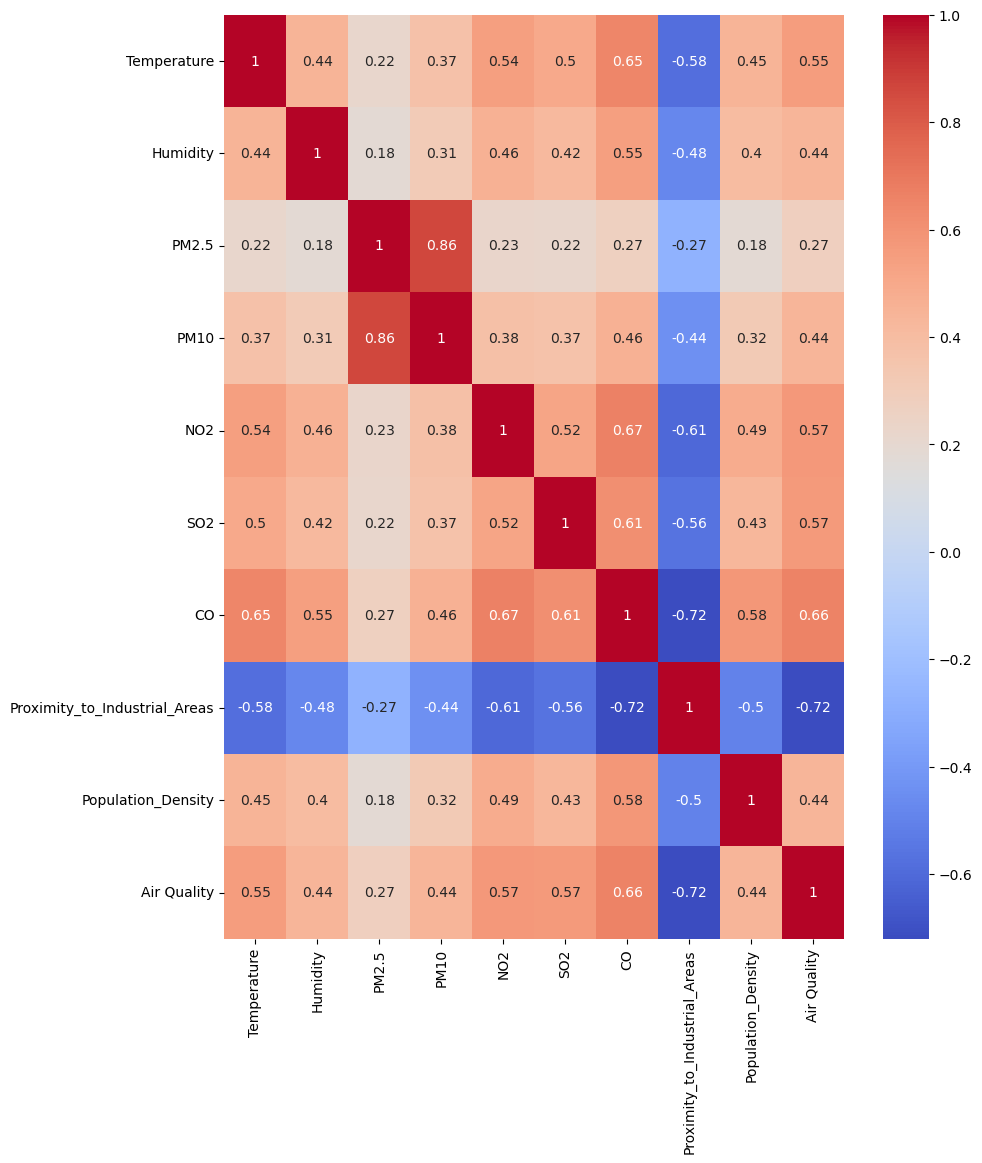

In [13]:
plt.figure(figsize=(10,12))
co_mat=up_df.corr()
sns.heatmap(co_mat,annot=True,cmap="coolwarm")

In [14]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=up_df.drop('Air Quality',axis=1)
df=pd.DataFrame()

df['features']=X.columns
df['vif']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
df

,features,vif
0,Temperature,37.521681
1,Humidity,28.289266
2,PM2.5,9.606920
3,PM10,17.162822
4,NO2,21.351751
5,SO2,6.356293
6,CO,29.862771
7,Proximity_to_Industrial_Areas,5.796020
8,Population_Density,18.046686


In [15]:
# vif=25
df['vif']>25
df[df['vif']<25]['features']
feature_to_keep=df[df['vif']<25]['features'].to_list()
feature_to_keep

['PM2.5',
 'PM10',
 'NO2',
 'SO2',
 'Proximity_to_Industrial_Areas',
 'Population_Density']

In [16]:
updated_df=up_df[feature_to_keep]
updated_df['Air Quality']=up_df['Air Quality']
updated_df

,PM2.5,PM10,NO2,SO2,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,5.2,17.9,18.9,9.2,6.3,319.0,2
1,2.3,12.2,30.8,9.7,6.0,611.0,2
2,26.7,33.8,24.4,12.6,5.2,619.0,2
3,6.1,6.3,13.5,5.3,11.1,551.0,0
4,6.9,16.0,21.9,5.6,12.7,303.0,0
...,...,...,...,...,...,...,...
4995,12.0,21.7,45.5,25.7,2.8,765.0,1
4996,6.9,25.0,25.3,10.8,5.7,709.0,2
4997,14.2,22.1,34.8,7.8,9.6,379.0,2
4998,21.4,29.0,23.7,5.7,11.6,241.0,0


In [17]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
input_columns=updated_df.drop('Air Quality',axis=1)
scaled_data=ss.fit_transform(input_columns)
scaled_data


array([[-0.72469677, -0.41720189, -0.85830122, -0.04250866, -0.58954204,
        -1.17100547],
       [-0.94521434, -0.76974491,  0.57833771,  0.04291871, -0.67450842,
         0.75214793],
       [ 0.91017486,  0.5662076 , -0.19430843,  0.53839747, -0.90108543,
         0.80483706],
       ...,
       [-0.0403319 , -0.15743334,  1.06124156, -0.2817053 ,  0.34508811,
        -0.77583696],
       [ 0.50715999,  0.26932926, -0.27881661, -0.64050027,  0.91153063,
        -1.68472452],
       [-0.20762109, -0.18217321, -0.33917959,  0.17960251, -0.02309953,
        -0.23577334]])

In [18]:
scaled_df=pd.DataFrame()
scaled_df[input_columns.columns]=scaled_data
scaled_df['Air Quality']=updated_df['Air Quality']
scaled_df

,PM2.5,PM10,NO2,SO2,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,-0.724697,-0.417202,-0.858301,-0.042509,-0.589542,-1.171005,2
1,-0.945214,-0.769745,0.578338,0.042919,-0.674508,0.752148,2
2,0.910175,0.566208,-0.194308,0.538397,-0.901085,0.804837,2
3,-0.656260,-1.134658,-1.510221,-0.708842,0.769920,0.356979,0
4,-0.595428,-0.534716,-0.496123,-0.657586,1.223074,-1.276384,0
...,...,...,...,...,...,...,...
4995,-0.207621,-0.182173,2.353009,2.776595,-1.580816,1.766414,1
4996,-0.595428,0.021931,-0.085655,0.230859,-0.759475,1.397590,2
4997,-0.040332,-0.157433,1.061242,-0.281705,0.345088,-0.775837,2
4998,0.507160,0.269329,-0.278817,-0.640500,0.911531,-1.684725,0


In [19]:
X=scaled_df.drop('Air Quality',axis=1)
y=scaled_df['Air Quality']

In [20]:
X

,PM2.5,PM10,NO2,SO2,Proximity_to_Industrial_Areas,Population_Density
0,-0.724697,-0.417202,-0.858301,-0.042509,-0.589542,-1.171005
1,-0.945214,-0.769745,0.578338,0.042919,-0.674508,0.752148
2,0.910175,0.566208,-0.194308,0.538397,-0.901085,0.804837
3,-0.656260,-1.134658,-1.510221,-0.708842,0.769920,0.356979
4,-0.595428,-0.534716,-0.496123,-0.657586,1.223074,-1.276384
...,...,...,...,...,...,...
4995,-0.207621,-0.182173,2.353009,2.776595,-1.580816,1.766414
4996,-0.595428,0.021931,-0.085655,0.230859,-0.759475,1.397590
4997,-0.040332,-0.157433,1.061242,-0.281705,0.345088,-0.775837
4998,0.507160,0.269329,-0.278817,-0.640500,0.911531,-1.684725


In [21]:
# dic={0:['None'],
#     1:['micro'],
#     2:['macro'],
#     3:['weighted']}
# scaled_df['Air Quality']=scaled_df['Air Quality'].map(dic)
# scaled_df['Air Quality']

In [32]:
y

0       2
1       2
2       2
3       0
4       0
       ..
4995    1
4996    2
4997    2
4998    0
4999    2
Name: Air Quality, Length: 5000, dtype: int32

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((4000, 6), (4000,), (1000, 6), (1000,))

In [36]:


from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg

LogisticRegression()

0.814
F1 Score (macro): 0.7408973906178818
precision is : 0.7751800172270047
Recall score is : 0.7277164510489611


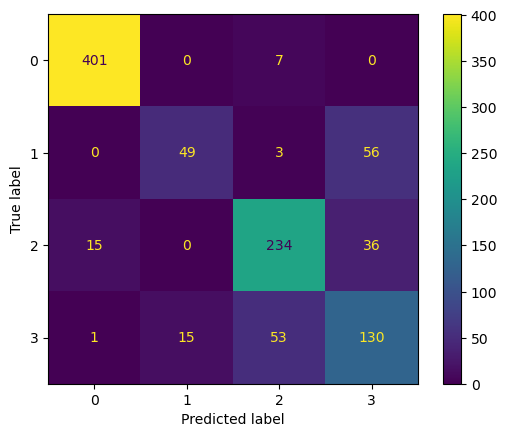

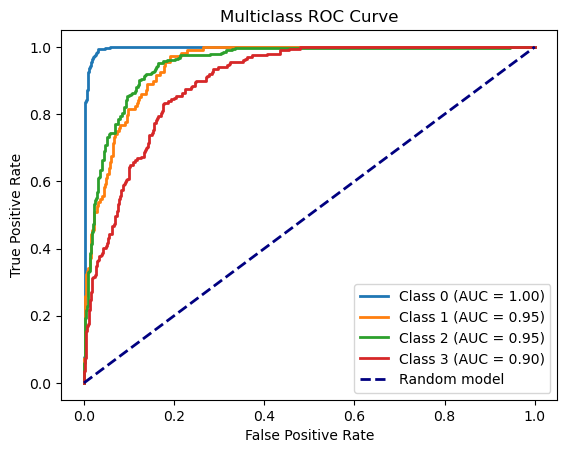

,Logistic_regression
Accuracy,0.814000
Recall,0.740897
f1score,0.775180
precisionscore,0.727716


In [40]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg
###############################################_fit
lg_model=lg.fit(X_train,y_train)
lg_model
##########################################_pred
y_pred=lg_model.predict(X_test)
y_pred[:5],y_test[:5]
#############################################################
from sklearn.metrics import recall_score,f1_score,\
                           precision_score,accuracy_score,\
                           roc_auc_score,auc,confusion_matrix,\
                           ConfusionMatrixDisplay,roc_curve

ac=accuracy_score(y_test,y_pred)
print(ac)
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score (macro):", f1)
pc =precision_score(y_test,y_pred,average='macro')
print('precision is :',pc)

re=recall_score(y_test,y_pred,average='macro')
print('Recall score is :',re)

#####################################################___COnfusion
cm=confusion_matrix(y_test,y_pred)
# Automatically detect the unique classes
classes = sorted(set(y_test))  # Ensures labels are sorted

# Create and display the confusion matrix
cmd = ConfusionMatrixDisplay(cm, display_labels=classes)
cmd.plot()
plt.show()
#############################################_Roc_Aoc_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Binarize the true labels
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Ensure y_pred contains predicted probabilities
# Replace this with your model's probability predictions
y_pred_proba = lg_model.predict_proba(X_test)  # Use your trained model here

# Plot ROC curve for each class
plt.figure()
for i, cls in enumerate(classes):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {cls} (AUC = {roc_auc:.2f})")

# Random model plot
plt.plot([0, 1], [0, 1], lw=2, color='navy', linestyle='--', label="Random model")


plt.title("Multiclass ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()
############################################__accuracy
auc(fpr,tpr)
###########################################################_____dataframe
lg=[ac,f1,pc,re]
lg_df=pd.DataFrame(lg,index=['Accuracy','Recall','f1score','precisionscore'],columns=['Logistic_regression'])
lg_df

0.836
F1 Score (macro): 0.7799356915134594
precision is : 0.7811612301011833
Recall score is : 0.7788350075108946


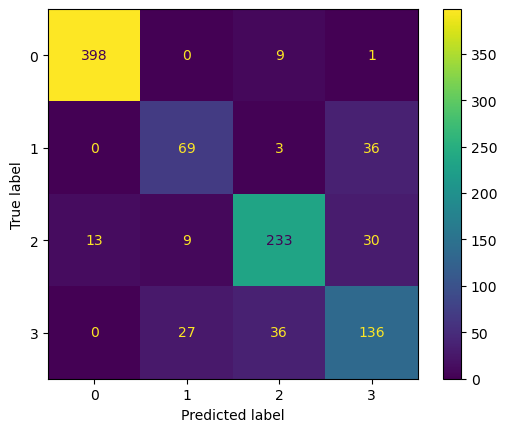

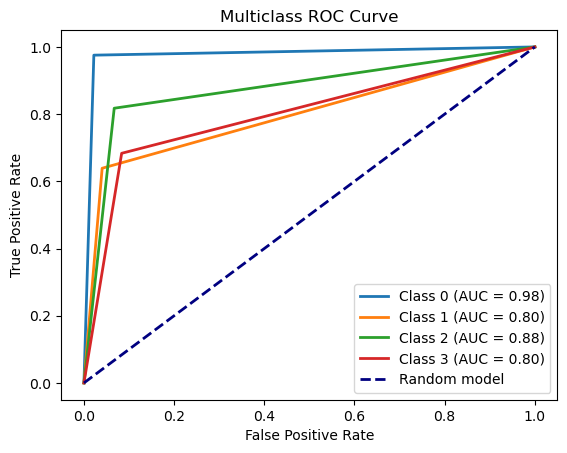

,Decision Tree
Accuracy,0.836000
Recall,0.779936
f1score,0.781161
precisionscore,0.778835


In [42]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt
###############################################_fit
dt_model=dt.fit(X_train,y_train)
dt_model
##########################################_pred
y_pred=dt_model.predict(X_test)
y_pred[:5],y_test[:5]
#############################################################
from sklearn.metrics import recall_score,f1_score,\
                           precision_score,accuracy_score,\
                           roc_auc_score,auc,confusion_matrix,\
                           ConfusionMatrixDisplay,roc_curve

ac=accuracy_score(y_test,y_pred)
print(ac)
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score (macro):", f1)
pc =precision_score(y_test,y_pred,average='macro')
print('precision is :',pc)

re=recall_score(y_test,y_pred,average='macro')
print('Recall score is :',re)

#####################################################___COnfusion
cm=confusion_matrix(y_test,y_pred)
# Automatically detect the unique classes
classes = sorted(set(y_test))  # Ensures labels are sorted

# Create and display the confusion matrix
cmd = ConfusionMatrixDisplay(cm, display_labels=classes)
cmd.plot()
plt.show()
#############################################_Roc_Aoc_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Binarize the true labels
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Ensure y_pred contains predicted probabilities
# Replace this with your model's probability predictions
y_pred_proba = dt_model.predict_proba(X_test)  # Use your trained model here

# Plot ROC curve for each class
plt.figure()
for i, cls in enumerate(classes):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {cls} (AUC = {roc_auc:.2f})")

# Random model plot
plt.plot([0, 1], [0, 1], lw=2, color='navy', linestyle='--', label="Random model")


plt.title("Multiclass ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()
############################################__accuracy
auc(fpr,tpr)
###########################################################_____dataframe
dt=[ac,f1,pc,re]
dt_df=pd.DataFrame(dt,index=['Accuracy','Recall','f1score','precisionscore'],columns=['Decision Tree'])
dt_df

0.826
F1 Score (macro): 0.7565018302845742
precision is : 0.7874313551595968
Recall score is : 0.7444144239140894


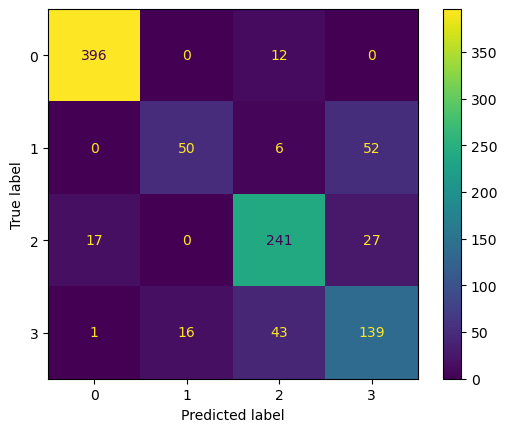

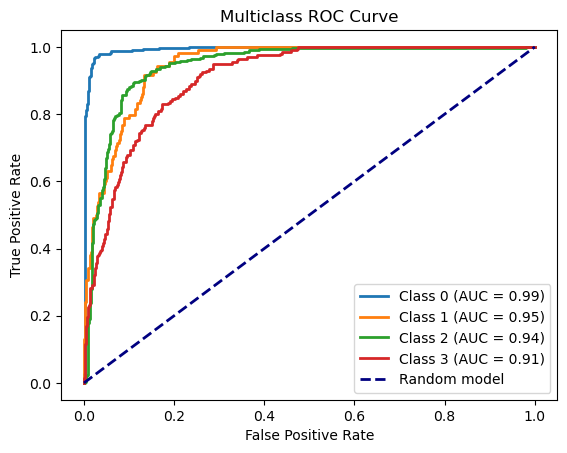

,Navie Byes
Accuracy,0.826000
f1score,0.756502
precisionscore,0.787431
Recall,0.744414


In [44]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB() 
nb
###############################################_fit
nb_model=nb.fit(X_train,y_train)
nb_model
##########################################_pred
y_pred=nb_model.predict(X_test)
y_pred[:5],y_test[:5]
#############################################################
from sklearn.metrics import recall_score,f1_score,\
                           precision_score,accuracy_score,\
                           roc_auc_score,auc,confusion_matrix,\
                           ConfusionMatrixDisplay,roc_curve

ac=accuracy_score(y_test,y_pred)
print(ac)
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score (macro):", f1)
pc =precision_score(y_test,y_pred,average='macro')
print('precision is :',pc)

re=recall_score(y_test,y_pred,average='macro')
print('Recall score is :',re)

#####################################################___COnfusion
cm=confusion_matrix(y_test,y_pred)
# Automatically detect the unique classes
classes = sorted(set(y_test))  # Ensures labels are sorted

# Create and display the confusion matrix
cmd = ConfusionMatrixDisplay(cm, display_labels=classes)
cmd.plot()
plt.show()
#############################################_Roc_Aoc_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Binarize the true labels
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Ensure y_pred contains predicted probabilities
# Replace this with your model's probability predictions
y_pred_proba = nb_model.predict_proba(X_test)  # Use your trained model here

# Plot ROC curve for each class
plt.figure()
for i, cls in enumerate(classes):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {cls} (AUC = {roc_auc:.2f})")

# Random model plot
plt.plot([0, 1], [0, 1], lw=2, color='navy', linestyle='--', label="Random model")


plt.title("Multiclass ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()
############################################__accuracy
auc(fpr,tpr)
###########################################################_____dataframe
nb=[ac,f1,pc,re]
nb_df=pd.DataFrame(nb,index=['Accuracy','f1score','precisionscore','Recall'],columns=['Navie Byes'])
nb_df

0.816
F1 Score (macro): 0.7230856191612006
precision is : 0.7503297950748955
Recall score is : 0.7137647228805419


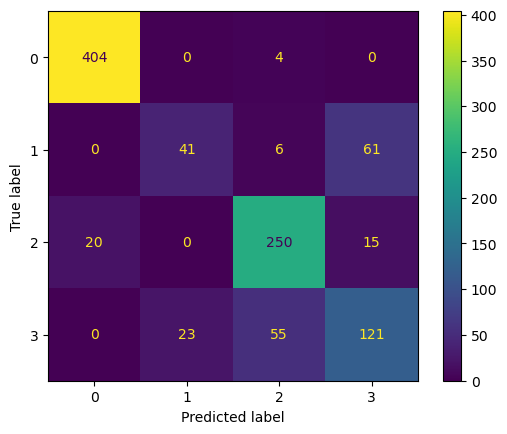

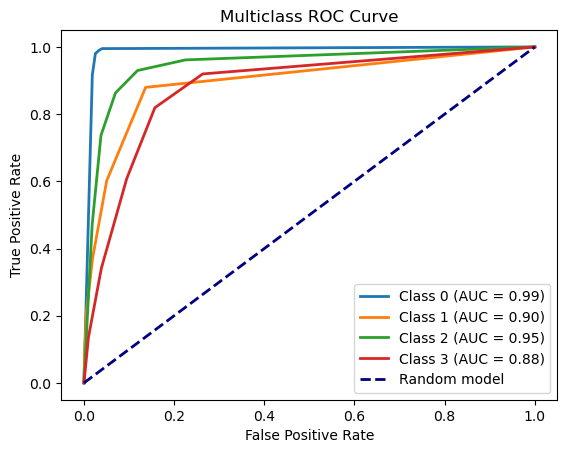

,KNN Neighbors
Accuracy,0.816000
f1score,0.723086
precisionscore,0.750330
Recall,0.713765


In [46]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn
###############################################_fit
kn_model=kn.fit(X_train,y_train)
kn_model
##########################################_pred
y_pred=kn_model.predict(X_test)
y_pred[:5],y_test[:5]
#############################################################
from sklearn.metrics import recall_score,f1_score,\
                           precision_score,accuracy_score,\
                           roc_auc_score,auc,confusion_matrix,\
                           ConfusionMatrixDisplay,roc_curve

ac=accuracy_score(y_test,y_pred)
print(ac)
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score (macro):", f1)
pc =precision_score(y_test,y_pred,average='macro')
print('precision is :',pc)

re=recall_score(y_test,y_pred,average='macro')
print('Recall score is :',re)

#####################################################___COnfusion
cm=confusion_matrix(y_test,y_pred)
# Automatically detect the unique classes
classes = sorted(set(y_test))  # Ensures labels are sorted

# Create and display the confusion matrix
cmd = ConfusionMatrixDisplay(cm, display_labels=classes)
cmd.plot()
plt.show()
#############################################_Roc_Aoc_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Binarize the true labels
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Ensure y_pred contains predicted probabilities
# Replace this with your model's probability predictions
y_pred_proba = kn_model.predict_proba(X_test)  # Use your trained model here

# Plot ROC curve for each class
plt.figure()
for i, cls in enumerate(classes):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {cls} (AUC = {roc_auc:.2f})")

# Random model plot
plt.plot([0, 1], [0, 1], lw=2, color='navy', linestyle='--', label="Random model")


plt.title("Multiclass ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()
############################################__accuracy
auc(fpr,tpr)
###########################################################_____dataframe
kn=[ac,f1,pc,re]
kn_df=pd.DataFrame(kn,index=['Accuracy','f1score','precisionscore','Recall'],columns=['KNN Neighbors'])
kn_df

In [48]:
df=pd.concat([lg_df,dt_df,nb_df,kn_df],axis=1)
df

,Logistic_regression,Decision Tree,Navie Byes,KNN Neighbors
Accuracy,0.814000,0.836000,0.826000,0.816000
Recall,0.740897,0.779936,0.744414,0.713765
f1score,0.775180,0.781161,0.756502,0.723086
precisionscore,0.727716,0.778835,0.787431,0.750330


**with hyper parameter tunning**

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits
the time taken is:134.77619457244873
0.861
F1 Score (macro): 0.8057344912836439
precision is : 0.8245463280640271
Recall score is : 0.7951282434129137


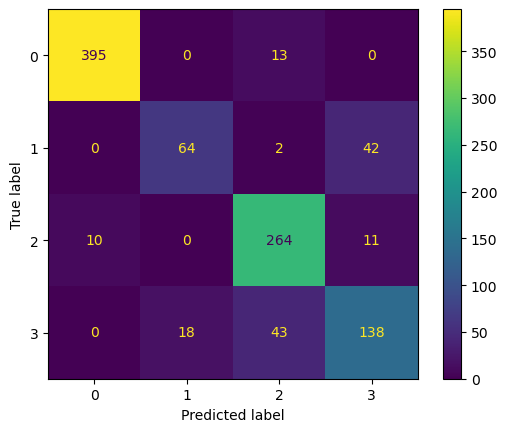

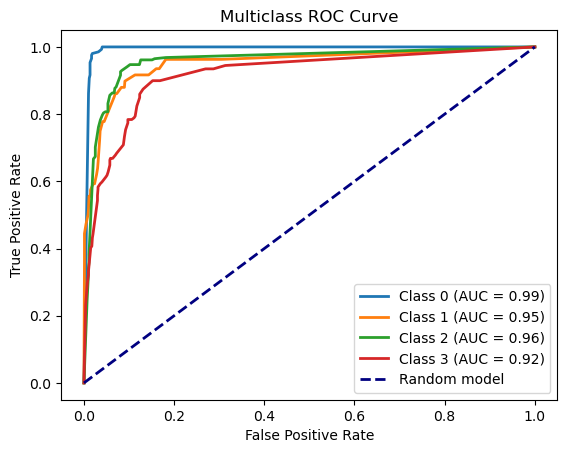

,Decision Tree
Accuracy,0.816000
f1score,0.723086
precisionscore,0.750330
Recall,0.713765


In [50]:
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
det= DecisionTreeClassifier()
det
###################################################################################_paramgrids
param_grid = {
    'criterion': ['gini', 'entropy'],  
    'max_depth': [None, 10, 20, 30, 40, 50], 
    'min_samples_split': [2, 5, 10, 20],  
    'min_samples_leaf': [1, 2, 4, 10],  
    'max_features': ['auto', 'sqrt', 'log2', None],  
    'splitter': ['best', 'random']
}
#####################################################################################gridsearch
grid_search=GridSearchCV(det,param_grid,scoring='accuracy',cv=5,verbose=True)
grid_search
############################################################################# model development  with timetaken
import time
start= time.time()
model=grid_search.fit(X_train,y_train)
end=time.time()
print(f"the time taken is:{end-start}")
#########################################################################best_estimtor
best_model=model.best_estimator_
best_model
#################################################################cvresults
grid_search.cv_results_
#########################################################modelprediction
y_pred=best_model.predict(X_test)
len(y_pred),len(y_test)
########################################################metrics table
from sklearn.metrics import recall_score,f1_score,\
                           precision_score,accuracy_score,\
                           roc_auc_score,auc,confusion_matrix,\
                           ConfusionMatrixDisplay,roc_curve

ac=accuracy_score(y_test,y_pred)
print(ac)
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score (macro):", f1)
pc =precision_score(y_test,y_pred,average='macro')
print('precision is :',pc)

re=recall_score(y_test,y_pred,average='macro')
print('Recall score is :',re)
##########################################################ROC _CURVE
# Binarize the true labels
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Ensure y_pred contains predicted probabilities
# Replace this with your model's probability predictions
y_pred_proba = best_model.predict_proba(X_test)  # Use your trained model here
#####################################################___COnfusion
cm=confusion_matrix(y_test,y_pred)
# Automatically detect the unique classes
classes = sorted(set(y_test))  # Ensures labels are sorted

# Create and display the confusion matrix
cmd = ConfusionMatrixDisplay(cm, display_labels=classes)
cmd.plot()
plt.show()

# Plot ROC curve for each class
plt.figure()
for i, cls in enumerate(classes):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {cls} (AUC = {roc_auc:.2f})")

# Random model plot
plt.plot([0, 1], [0, 1], lw=2, color='navy', linestyle='--', label="Random model")


plt.title("Multiclass ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()
############################################__accuracy
auc(fpr,tpr)
###########################################################_____dataframe
det=[ac,f1,pc,re]
det_df=pd.DataFrame(kn,index=['Accuracy','f1score','precisionscore','Recall'],columns=['Decision Tree'])
det_df


Fitting 5 folds for each of 810 candidates, totalling 4050 fits
the time taken is:302.7418758869171
0.813
F1 Score (macro): 0.7400169506331374
precision is : 0.7743443747153531
Recall score is : 0.726839258066505


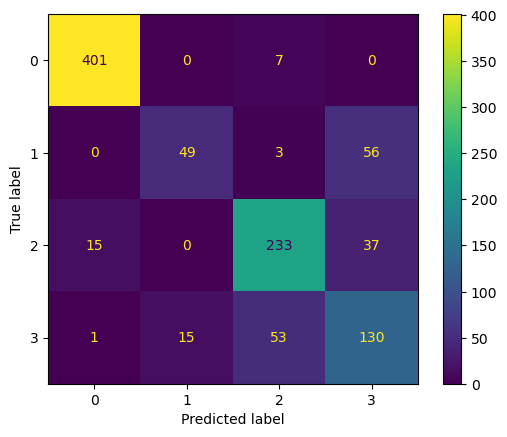

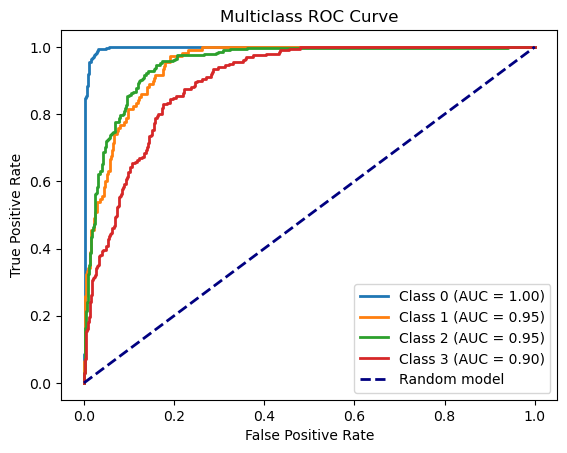

,Logistic regression
Accuracy,0.813000
f1score,0.740017
precisionscore,0.774344
Recall,0.726839


In [51]:
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
leg=LogisticRegression ()
leg
###################################################################################_paramgrids
param_grid = {
    'penalty': ['l2', 'l1', 'elasticnet'],  # Regularization types
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga', 'lbfgs'],  # Solvers for optimization
    'class_weight': [None, 'balanced'],  # Handle class imbalance
    'max_iter': [100, 200, 500],  # Maximum iterations for convergence
    'l1_ratio': [0.1, 0.5, 0.9]  # ElasticNet-specific (used with 'saga')
}

#####################################################################################gridsearch
grid_search=GridSearchCV(leg,param_grid,scoring='accuracy',cv=5,verbose=True)
grid_search
############################################################################# model development  with timetaken
import time
start= time.time()
model=grid_search.fit(X_train,y_train)
end=time.time()
print(f"the time taken is:{end-start}")
#########################################################################best_estimtor
best_model=model.best_estimator_
best_model
#################################################################cvresults
grid_search.cv_results_
#########################################################modelprediction
y_pred=best_model.predict(X_test)
len(y_pred),len(y_test)
########################################################metrics table
from sklearn.metrics import recall_score,f1_score,\
                           precision_score,accuracy_score,\
                           roc_auc_score,auc,confusion_matrix,\
                           ConfusionMatrixDisplay,roc_curve

ac=accuracy_score(y_test,y_pred)
print(ac)
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score (macro):", f1)
pc =precision_score(y_test,y_pred,average='macro')
print('precision is :',pc)

re=recall_score(y_test,y_pred,average='macro')
print('Recall score is :',re)
##########################################################ROC _CURVE
# Binarize the true labels
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Ensure y_pred contains predicted probabilities
# Replace this with your model's probability predictions
y_pred_proba = best_model.predict_proba(X_test)  # Use your trained model here
#####################################################___COnfusion
cm=confusion_matrix(y_test,y_pred)
# Automatically detect the unique classes
classes = sorted(set(y_test))  # Ensures labels are sorted

# Create and display the confusion matrix
cmd = ConfusionMatrixDisplay(cm, display_labels=classes)
cmd.plot()
plt.show()

# Plot ROC curve for each class
plt.figure()
for i, cls in enumerate(classes):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {cls} (AUC = {roc_auc:.2f})")

# Random model plot
plt.plot([0, 1], [0, 1], lw=2, color='navy', linestyle='--', label="Random model")


plt.title("Multiclass ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()
############################################__accuracy
auc(fpr,tpr)
###########################################################_____dataframe
leg=[ac,f1,pc,re]
leg_df=pd.DataFrame(leg,index=['Accuracy','f1score','precisionscore','Recall'],columns=['Logistic regression'])
leg_df


Fitting 5 folds for each of 5 candidates, totalling 25 fits
the time taken is:0.28501081466674805
0.826
F1 Score (macro): 0.7565018302845742
precision is : 0.7874313551595968
Recall score is : 0.7444144239140894


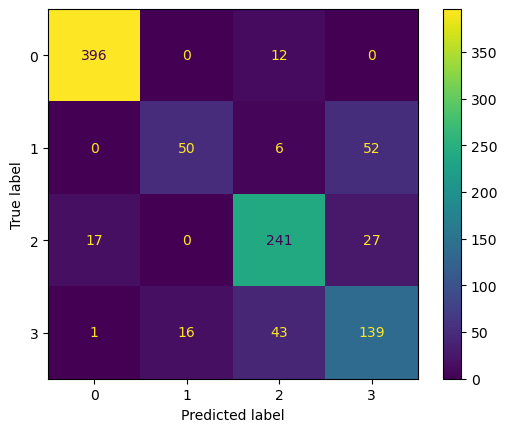

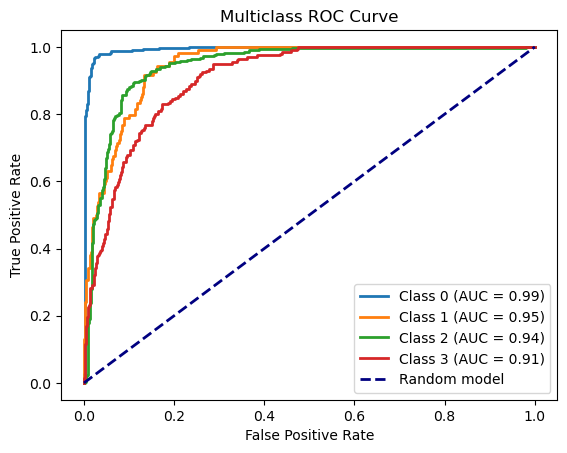

,Navie Byes
Accuracy,0.826000
f1score,0.756502
precisionscore,0.787431
Recall,0.744414


In [52]:
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.naive_bayes import GaussianNB
neb=GaussianNB()
neb
###################################################################################_paramgrids
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  
}

#####################################################################################gridsearch
grid_search=GridSearchCV(neb,param_grid,scoring='accuracy',cv=5,verbose=True)
grid_search
############################################################################# model development  with timetaken
import time
start= time.time()
model=grid_search.fit(X_train,y_train)
end=time.time()
print(f"the time taken is:{end-start}")
#########################################################################best_estimtor
best_model=model.best_estimator_
best_model
#################################################################cvresults
grid_search.cv_results_
#########################################################modelprediction
y_pred=best_model.predict(X_test)
len(y_pred),len(y_test)
########################################################metrics table
from sklearn.metrics import recall_score,f1_score,\
                           precision_score,accuracy_score,\
                           roc_auc_score,auc,confusion_matrix,\
                           ConfusionMatrixDisplay,roc_curve

ac=accuracy_score(y_test,y_pred)
print(ac)
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score (macro):", f1)
pc =precision_score(y_test,y_pred,average='macro')
print('precision is :',pc)

re=recall_score(y_test,y_pred,average='macro')
print('Recall score is :',re)
##########################################################ROC _CURVE
# Binarize the true labels
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Ensure y_pred contains predicted probabilities
# Replace this with your model's probability predictions
y_pred_proba = best_model.predict_proba(X_test)  # Use your trained model here
#####################################################___COnfusion
cm=confusion_matrix(y_test,y_pred)
# Automatically detect the unique classes
classes = sorted(set(y_test))  # Ensures labels are sorted

# Create and display the confusion matrix
cmd = ConfusionMatrixDisplay(cm, display_labels=classes)
cmd.plot()
plt.show()

# Plot ROC curve for each class
plt.figure()
for i, cls in enumerate(classes):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {cls} (AUC = {roc_auc:.2f})")

# Random model plot
plt.plot([0, 1], [0, 1], lw=2, color='navy', linestyle='--', label="Random model")


plt.title("Multiclass ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()
############################################__accuracy
auc(fpr,tpr)
###########################################################_____dataframe
neb=[ac,f1,pc,re]
neb_df=pd.DataFrame(neb,index=['Accuracy','f1score','precisionscore','Recall'],columns=['Navie Byes'])
neb_df


Fitting 5 folds for each of 96 candidates, totalling 480 fits
the time taken is:42.729581117630005
0.826
F1 Score (macro): 0.7565018302845742
precision is : 0.7874313551595968
Recall score is : 0.7444144239140894


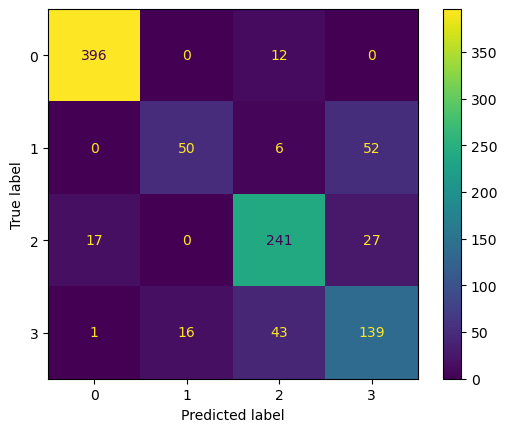

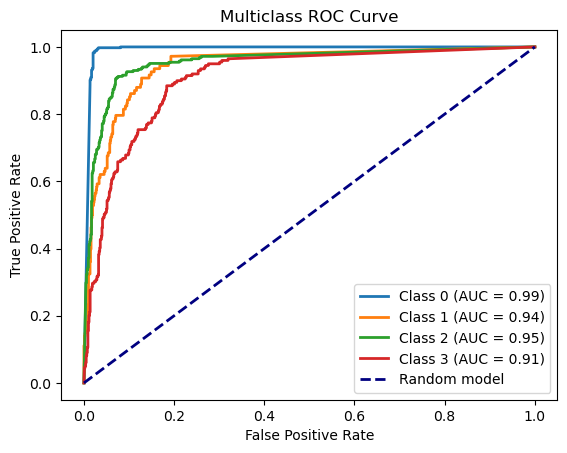

,Knn neighbors
Accuracy,0.826000
f1score,0.756502
precisionscore,0.787431
Recall,0.744414


In [56]:
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.neighbors  import KNeighborsClassifier
knb=KNeighborsClassifier()
knb
###################################################################################_paramgrids
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],  # Distance metric
    'p': [1, 2]  # Power parameter for Minkowski metric (1=Manhattan, 2=Euclidean)
}
#####################################################################################gridsearch
grid_search=GridSearchCV(knb,param_grid,scoring='accuracy',cv=5,verbose=True)
grid_search
############################################################################# model development  with timetaken
import time
start= time.time()
model=grid_search.fit(X_train,y_train)
end=time.time()
print(f"the time taken is:{end-start}")
#########################################################################best_estimtor
knbb_model=model.best_estimator_
knbb_model
#################################################################cvresults
grid_search.cv_results_
#########################################################modelprediction
y_pred=best_model.predict(X_test)
len(y_pred),len(y_test)
########################################################metrics table
from sklearn.metrics import recall_score,f1_score,\
                           precision_score,accuracy_score,\
                           roc_auc_score,auc,confusion_matrix,\
                           ConfusionMatrixDisplay,roc_curve

ac=accuracy_score(y_test,y_pred)
print(ac)
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score (macro):", f1)
pc =precision_score(y_test,y_pred,average='macro')
print('precision is :',pc)

re=recall_score(y_test,y_pred,average='macro')
print('Recall score is :',re)
##########################################################ROC _CURVE
# Binarize the true labels
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Ensure y_pred contains predicted probabilities
# Replace this with your model's probability predictions
y_pred_proba = knbb_model.predict_proba(X_test)  # Use your trained model here
#####################################################___COnfusion
cm=confusion_matrix(y_test,y_pred)
# Automatically detect the unique classes
classes = sorted(set(y_test))  # Ensures labels are sorted

# Create and display the confusion matrix
cmd = ConfusionMatrixDisplay(cm, display_labels=classes)
cmd.plot()
plt.show()

# Plot ROC curve for each class
plt.figure()
for i, cls in enumerate(classes):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Class {cls} (AUC = {roc_auc:.2f})")

# Random model plot
plt.plot([0, 1], [0, 1], lw=2, color='navy', linestyle='--', label="Random model")


plt.title("Multiclass ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()
############################################__accuracy
auc(fpr,tpr)
###########################################################_____dataframe
knb=[ac,f1,pc,re]
knb_df=pd.DataFrame(knb,index=['Accuracy','f1score','precisionscore','Recall'],columns=['Knn neighbors'])
knb_df




In [58]:
df

,Logistic_regression,Decision Tree,Navie Byes,KNN Neighbors
Accuracy,0.814000,0.836000,0.826000,0.816000
Recall,0.740897,0.779936,0.744414,0.713765
f1score,0.775180,0.781161,0.756502,0.723086
precisionscore,0.727716,0.778835,0.787431,0.750330


In [60]:
w_df=pd.concat([det_df,leg_df,neb_df,knb_df],axis=1)
w_df

,Decision Tree,Logistic regression,Navie Byes,Knn neighbors
Accuracy,0.816000,0.813000,0.826000,0.826000
f1score,0.723086,0.740017,0.756502,0.756502
precisionscore,0.750330,0.774344,0.787431,0.787431
Recall,0.713765,0.726839,0.744414,0.744414


In [70]:
import pickle
pickle.dump(knbb_model,open('updated_Air pollution set.pkl','wb'))

In [72]:
model=pickle.load(open('updated_Air pollution set.pkl','rb'))
model.predict([[1,2,3,4,5,6,7]])

ValueError: X has 7 features, but KNeighborsClassifier is expecting 6 features as input.